In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [6]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import SpectralClustering

import hsilib as hl
hl = reload(hl)

from time import time

In [3]:
def get_rayleigh_scattering(HSI):
    rayleigh_sig = np.zeros(shape = bands, dtype = HSI.dtype)
    for i in range(bands):
        layer = HSI[..., i]
        rayleigh_sig[i] = layer[layer > 0].min()
        
    return rayleigh_sig

753 1924 187


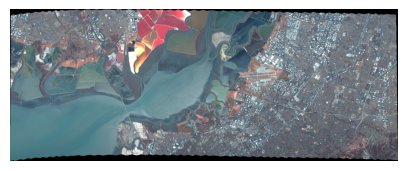

In [4]:
import spectral.io.envi as envi
hsi_path = r'C:\Users\konst\jupyter_notebook\HSI\data envil\moffet\\'
moffett_hsi = envi.open(hsi_path + r'f080611t01p00r07rdn_c_sc01_ort_img.hdr',
                        hsi_path + r'f080611t01p00r07rdn_c_sc01_ort_img')

HSI = np.array(np.rot90(moffett_hsi.open_memmap(writble = True)), dtype = np.float32)

HSI = np.concatenate((HSI[..., :94], HSI[..., 131:]), axis = 2)

height, width, bands = HSI.shape

color_image = hl.HSI_to_RGB(HSI, (37, 18, 11))
print(height, width, bands)
hl.show(color_image, figsize = (5, 5))

In [5]:
rayleigh_scattering = get_rayleigh_scattering(HSI)
HSI -= rayleigh_scattering
HSI[HSI < 0] = 0

In [20]:
bool_mask = np.all(HSI == 0, axis = 2)

clear_HSI = HSI[bool_mask == False]

In [22]:
clustering = SpectralClustering(n_clusters=2, assign_labels='cluster_qr', random_state=0).fit(clear_HSI)

MemoryError: Unable to allocate 13.9 TiB for an array with shape (1380437, 1380437) and data type float64